# Lookback time (SCDM "Curvature" movie)
Florent Leclercq<br/>
Institut d'Astrophysique de Paris<br/>
13 July 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
from LookbackTimeLib import *

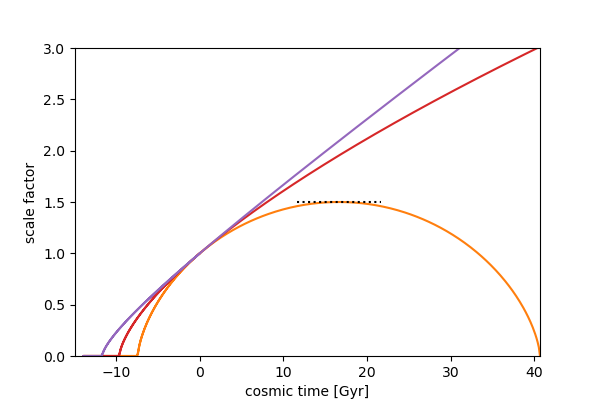

In [3]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.set_xlim([tmin-1.,tmax])
ax.set_xlabel("cosmic time [Gyr]")
ax.set_ylim([0.,3.])
ax.set_ylabel("scale factor")
ax.plot(t, a1_of_t(t), color="C1")
# ax.plot([tcrit1,tcrit1], [0.,acrit1], ls=":", color="black")
ax.plot([tcrit1-5,tcrit1+5], [acrit1,acrit1], ls=":", color="black")
ax.plot(t, a2_of_t(t), color="C3")
ax.plot(t, a3_of_t(t), color="C4")
# ax.plot(t, a4_of_t(t), color="C9")

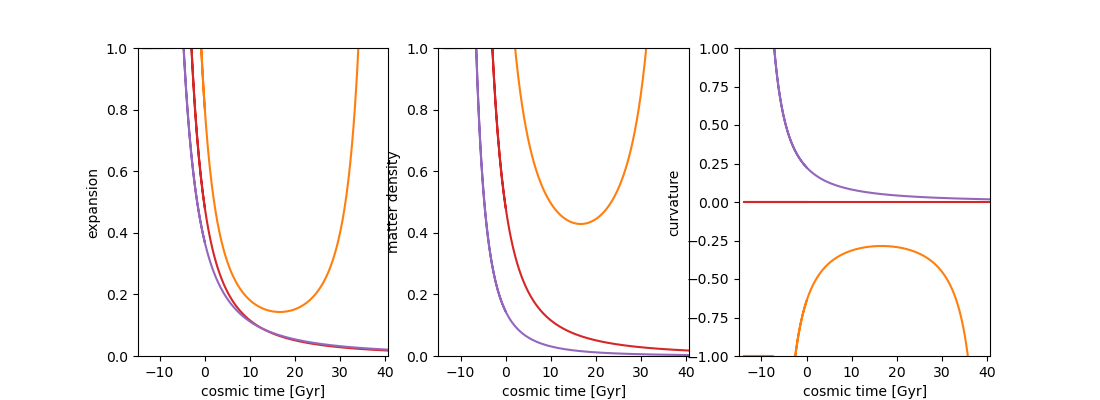

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(11,4))
ax0.set_xlim([tmin-1.,tmax])
ax0.set_xlabel("cosmic time [Gyr]")
ax0.set_ylim([0.,1.])
ax0.set_ylabel("expansion")
ax0.plot(t, E1, color="C1")
ax0.plot(t, E2, color="C3")
ax0.plot(t, E3, color="C4")
# ax0.plot(t, E4, color="C9")

ax1.set_xlim([tmin-1.,tmax])
ax1.set_xlabel("cosmic time [Gyr]")
ax1.set_ylim([0.,1.])
ax1.set_ylabel("matter density")
ax1.plot(t, M1, color="C1")
ax1.plot(t, M2, color="C3")
ax1.plot(t, M3, color="C4")
# ax1.plot(t, M4, color="C9")

ax2.set_xlim([tmin-1.,tmax])
ax2.set_xlabel("cosmic time [Gyr]")
ax2.set_ylim([-1.,1.])
ax2.set_ylabel("curvature")
ax2.plot(t, K1, color="C1")
ax2.plot(t, K2, color="C3")
ax2.plot(t, K3, color="C4")
# ax2.plot(t, K4, color="C9")

In [5]:
class movie:
    @staticmethod
    def set_xvalues(polygon, x0, x1):
        _ndarray = polygon.get_xy()
        _ndarray[:, 0] = [x0, x0, x1, x1, x0]
        polygon.set_xy(_ndarray)
        
    def __init__(self, alist0, alist1, alist2, Elist0, Elist1, Elist2, Mlist0, Mlist1, Mlist2, Klist0, Klist1, Klist2):
        plt.clf()
        self.fig, ((self.ax0a, self.ax1a, self.ax2a), (self.ax0b, self.ax1b, self.ax2b),\
                   (self.ax0c, self.ax1c, self.ax2c), (self.ax0d, self.ax1d, self.ax2d)) =\
        plt.subplots(4,3, figsize=(10,4), height_ratios=[1, 0.1, 0.1, 0.1])
        self.ax0a.remove()
        self.ax0a = self.fig.add_subplot(4,3,1,projection='3d')
        self.ax1a.remove()
        self.ax1a = self.fig.add_subplot(4,3,2,projection='3d')
        self.ax2a.remove()
        self.ax2a = self.fig.add_subplot(4,3,3,projection='3d')
        self.fig.tight_layout(pad=0., h_pad=-0.5)
        self.steps = len(alist0)
        
        # Set timestepping
        self.alist0, self.alist1, self.alist2 = alist0, alist1, alist2
        self.astart0, self.astart1, self.astart2 = alist0[0], alist1[0], alist2[0]
        self.steps = len(alist0)

        # Set bars
        self.Elist0, self.Elist1, self.Elist2 = Elist0, Elist1, Elist2
        self.Mlist0, self.Mlist1, self.Mlist2 = Mlist0, Mlist1, Mlist2
        self.Klist0, self.Klist1, self.Klist2 = Klist0, Klist1, Klist2
        
        # Set the mesh size
        size = self.size = 3
        
        # Generate lattice points
        self.x, self.y, self.z = np.tile(np.arange(size),size*size), np.tile(np.repeat(np.arange(size),size),size),\
        np.repeat(np.arange(size),size*size)
        self.mx, self.my, self.mz = np.meshgrid(range(size), range(size), range(size))

        # Set grid for recollapsing universe
        amax=1.
        self.x0max=amax*self.x+(1-amax)
        self.y0max=amax*self.y+(1-amax)
        self.z0max=amax*self.z+(1-amax)
        self.mx0max=amax*self.mx+(1-amax)
        self.my0max=amax*self.my+(1-amax)
        self.mz0max=amax*self.mz+(1-amax)
        
    def show(self):
        self.fig.show()
    
    # Initialization function
    def init(self):
        astart0, astart1, astart2 = self.astart0, self.astart1, self.astart2
        Elist0, Elist1, Elist2 = self.Elist0, self.Elist1, self.Elist2
        Mlist0, Mlist1, Mlist2 = self.Mlist0, self.Mlist1, self.Mlist2
        Klist0, Klist1, Klist2 = self.Klist0, self.Klist1, self.Klist2
        ax0a, ax1a, ax2a = self.ax0a, self.ax1a, self.ax2a
        ax0b, ax1b, ax2b = self.ax0b, self.ax1b, self.ax2b
        ax0c, ax1c, ax2c = self.ax0c, self.ax1c, self.ax2c
        ax0d, ax1d, ax2d = self.ax0d, self.ax1d, self.ax2d
        size = self.size
        
        for axa in {ax0a,ax1a,ax2a}:
            # Remove axis labels
            axa.set_axis_off()
            # Set plot limits
            axa.set_xlim([0, size-1])
            axa.set_ylim([0, size-1])
            axa.set_zlim([0, size-1])
            # Set aspect equal
            axa.set_box_aspect([1, 1, 1])
            # Set projection angle
            axa.view_init(elev=20, azim=35)  # Set the elevation and azimuth angles
            
        # Scale lattice points
        x0=astart0*self.x+(1-astart0)
        y0=astart0*self.y+(1-astart0)
        z0=astart0*self.z+(1-astart0)
        mx0=astart0*self.mx+(1-astart0)
        my0=astart0*self.my+(1-astart0)
        mz0=astart0*self.mz+(1-astart0)        
        x1=astart1*self.x+(1-astart1)
        y1=astart1*self.y+(1-astart1)
        z1=astart1*self.z+(1-astart1)
        mx1=astart1*self.mx+(1-astart1)
        my1=astart1*self.my+(1-astart1)
        mz1=astart1*self.mz+(1-astart1)
        x2=astart2*self.x+(1-astart2)
        y2=astart2*self.y+(1-astart2)
        z2=astart2*self.z+(1-astart2)
        mx2=astart2*self.mx+(1-astart2)
        my2=astart2*self.my+(1-astart2)
        mz2=astart2*self.mz+(1-astart2)
        x0max, y0max, z0max = self.x0max, self.y0max, self.z0max
        mx0max, my0max, mz0max = self.mx0max, self.my0max, self.mz0max
        
        # Plot lattice points
        self.plot0, = ax0a.plot(x0, y0, z0, linestyle="", color='C1', marker="o")
        self.plot1, = ax1a.plot(x1, y1, z1, linestyle="", color='C3', marker="o")
        self.plot2, = ax2a.plot(x2, y2, z2, linestyle="", color='C4', marker="o")
        self.plot0max = None
        # self.plot0max, = ax0a.plot(x0max, y0max, z0max, linestyle="", color='black', marker="None")
        
        # Plot the cubes
        self.lines_x0, self.lines_y0, self.lines_z0 = {}, {}, {}
        self.lines_x1, self.lines_y1, self.lines_z1 = {}, {}, {}
        self.lines_x2, self.lines_y2, self.lines_z2 = {}, {}, {}
        self.lines_x0max, self.lines_y0max, self.lines_z0max = {}, {}, {}
        for i in range(size-1):
            for j in range(size):
                for k in range(size):
                    self.lines_x0[i,j,k], = ax0a.plot([mx0[i,j,k], mx0[i+1,j,k]], [my0[i,j,k], my0[i+1,j,k]],
                                                     [mz0[i,j,k], mz0[i+1,j,k]], color='C1')
                    self.lines_x1[i,j,k], = ax1a.plot([mx1[i,j,k], mx1[i+1,j,k]], [my1[i,j,k], my1[i+1,j,k]],
                                                     [mz1[i,j,k], mz1[i+1,j,k]], color='C3')
                    self.lines_x2[i,j,k], = ax2a.plot([mx2[i,j,k], mx2[i+1,j,k]], [my2[i,j,k], my2[i+1,j,k]],
                                                     [mz2[i,j,k], mz2[i+1,j,k]], color='C4')
                    self.lines_x0max[i,j,k], = ax0a.plot([mx0max[i,j,k], mx0max[i+1,j,k]], [my0max[i,j,k], my0max[i+1,j,k]],
                                                     [mz0max[i,j,k], mz0max[i+1,j,k]], ls='None', color='black')
        for i in range(size):
            for j in range(size-1):
                for k in range(size):
                    self.lines_y0[i,j,k], = ax0a.plot([mx0[i,j,k], mx0[i,j+1,k]], [my0[i,j,k], my0[i,j+1,k]],
                                                     [mz0[i,j,k], mz0[i,j+1,k]], color='C1')
                    self.lines_y1[i,j,k], = ax1a.plot([mx1[i,j,k], mx1[i,j+1,k]], [my1[i,j,k], my1[i,j+1,k]],
                                                     [mz1[i,j,k], mz1[i,j+1,k]], color='C3')
                    self.lines_y2[i,j,k], = ax2a.plot([mx2[i,j,k], mx2[i,j+1,k]], [my2[i,j,k], my2[i,j+1,k]],
                                                     [mz2[i,j,k], mz2[i,j+1,k]], color='C4')
                    self.lines_y0max[i,j,k], = ax0a.plot([mx0max[i,j,k], mx0max[i,j+1,k]], [my0max[i,j,k], my0max[i,j+1,k]],
                                                     [mz0max[i,j,k], mz0max[i,j+1,k]], ls='None', color='black')
        for i in range(size):
            for j in range(size):
                for k in range(size-1):
                    self.lines_z0[i,j,k], = ax0a.plot([mx0[i,j,k], mx0[i,j,k+1]], [my0[i,j,k], my0[i,j,k+1]],
                                                     [mz0[i,j,k], mz0[i,j,k+1]], color='C1')
                    self.lines_z1[i,j,k], = ax1a.plot([mx1[i,j,k], mx1[i,j,k+1]], [my1[i,j,k], my1[i,j,k+1]],
                                                     [mz1[i,j,k], mz1[i,j,k+1]], color='C3')
                    self.lines_z2[i,j,k], = ax2a.plot([mx2[i,j,k], mx2[i,j,k+1]], [my2[i,j,k], my2[i,j,k+1]],
                                                     [mz2[i,j,k], mz2[i,j,k+1]], color='C4')
                    self.lines_z0max[i,j,k], = ax0a.plot([mx0max[i,j,k], mx0max[i,j,k+1]], [my0max[i,j,k], my0max[i,j,k+1]],
                                                     [mz0max[i,j,k], mz0max[i,j,k+1]], ls='None', color='black')

        # Plot the energies
        for ax in {ax0b,ax1b,ax2b,ax0c,ax1c,ax2c,ax0d,ax1d,ax2d}:
            ax.set_aspect(0.1)
            ax.set_ylim([0.,1.])
            ax.set_xlim([0.,1.])
            ax.set_xticks([])
            ax.set_yticks([])
            [x.set_linewidth(2.) for x in ax.spines.values()]
        self.E0 = ax0b.axvspan(0., Elist0[0], color="C6")
        self.M0 = ax0c.axvspan(0., Mlist0[0], color="C0")
        self.K0 = ax0d.axvspan(0., -Klist0[0], color="C2")
        self.barE0 = ax0b.axvline([Elist0[0]], color="black")
        self.barM0 = ax0c.axvline([Mlist0[0]], color="black")
        self.barK0 = ax0d.axvline([-Klist0[0]], color="black")
        self.E1 = ax1b.axvspan(0., Elist1[0], color="C6")
        self.M1 = ax1c.axvspan(0., Mlist1[0], color="C0")
        self.K1 = ax1d.axvspan(0., -Klist1[0], color="C2")
        self.barE1 = ax1b.axvline([Elist1[0]], color="black")
        self.barM1 = ax1c.axvline([Mlist1[0]], color="black")
        self.barK1 = ax1d.axvline([-Klist1[0]], color="black")
        self.E2 = ax2b.axvspan(0., Elist2[0], color="C6")
        self.M2 = ax2c.axvspan(0., Mlist2[0], color="C0")
        self.K2 = ax2d.axvspan(1., 1-Klist2[0], color="C2")
        self.barE2 = ax2b.axvline([Elist2[0]], color="black")
        self.barM2 = ax2c.axvline([Mlist2[0]], color="black")
        self.barK2 = ax2d.axvline([1-Klist2[0]], color="black")
        
        return self.plot0, self.plot1, self.plot2, self.plot0max, self.lines_x0, self.lines_y0, self.lines_z0,\
        self.lines_x1, self.lines_y1, self.lines_z1, self.lines_x2, self.lines_y2, self.lines_z2,\
        self.lines_x0max, self.lines_y0max, self.lines_z0max,\
        self.E0, self.M0, self.K0, self.barE0, self.barM0, self.barK0, self.E1, self.M1, self.K1,\
        self.barE1, self.barM1, self.barK1, self.E2, self.M2, self.K2, self.barE2, self.barM2, self.barK2,
    
    # Update function
    def update(self, frame):
        a0, a1, a2 = self.alist0[frame], self.alist1[frame], self.alist2[frame]
        Elist0, Elist1, Elist2 = self.Elist0, self.Elist1, self.Elist2
        Mlist0, Mlist1, Mlist2 = self.Mlist0, self.Mlist1, self.Mlist2
        Klist0, Klist1, Klist2 = self.Klist0, self.Klist1, self.Klist2
        size = self.size
        
        # Scale lattice points
        x0=a0*self.x+(1-a0)
        y0=a0*self.y+(1-a0)
        z0=a0*self.z+(1-a0)
        mx0=a0*self.mx+(1-a0)
        my0=a0*self.my+(1-a0)
        mz0=a0*self.mz+(1-a0)
        x1=a1*self.x+(1-a1)
        y1=a1*self.y+(1-a1)
        z1=a1*self.z+(1-a1)
        mx1=a1*self.mx+(1-a1)
        my1=a1*self.my+(1-a1)
        mz1=a1*self.mz+(1-a1)
        x2=a2*self.x+(1-a2)
        y2=a2*self.y+(1-a2)
        z2=a2*self.z+(1-a2)
        mx2=a2*self.mx+(1-a2)
        my2=a2*self.my+(1-a2)
        mz2=a2*self.mz+(1-a2)
        
        # Plot lattice points
        self.plot0.set_data(x0,y0)
        self.plot0.set_3d_properties(z0)
        self.plot1.set_data(x1,y1)
        self.plot1.set_3d_properties(z1)
        self.plot2.set_data(x2,y2)
        self.plot2.set_3d_properties(z2)
        # if t[frame]>tcrit1:
        #     self.plot0max.set_marker('o')
        
        # Plot the cubes
        for i in range(size-1):
            for j in range(size):
                for k in range(size):
                    self.lines_x0[i,j,k].set_data([mx0[i,j,k], mx0[i+1,j,k]], [my0[i,j,k], my0[i+1,j,k]])
                    self.lines_x0[i,j,k].set_3d_properties([mz0[i,j,k], mz0[i+1,j,k]])
                    self.lines_x1[i,j,k].set_data([mx1[i,j,k], mx1[i+1,j,k]], [my1[i,j,k], my1[i+1,j,k]])
                    self.lines_x1[i,j,k].set_3d_properties([mz1[i,j,k], mz1[i+1,j,k]])
                    self.lines_x2[i,j,k].set_data([mx2[i,j,k], mx2[i+1,j,k]], [my2[i,j,k], my2[i+1,j,k]])
                    self.lines_x2[i,j,k].set_3d_properties([mz2[i,j,k], mz2[i+1,j,k]])
                    if t[frame]>tcrit1:
                        self.lines_x0max[i,j,k].set_linestyle(":")
        for i in range(size):
            for j in range(size-1):
                for k in range(size):
                    self.lines_y0[i,j,k].set_data([mx0[i,j,k], mx0[i,j+1,k]], [my0[i,j,k], my0[i,j+1,k]])
                    self.lines_y0[i,j,k].set_3d_properties([mz0[i,j,k], mz0[i,j+1,k]])
                    self.lines_y1[i,j,k].set_data([mx1[i,j,k], mx1[i,j+1,k]], [my1[i,j,k], my1[i,j+1,k]])
                    self.lines_y1[i,j,k].set_3d_properties([mz1[i,j,k], mz1[i,j+1,k]])
                    self.lines_y2[i,j,k].set_data([mx2[i,j,k], mx2[i,j+1,k]], [my2[i,j,k], my2[i,j+1,k]])
                    self.lines_y2[i,j,k].set_3d_properties([mz2[i,j,k], mz2[i,j+1,k]])
                    if t[frame]>tcrit1:
                        self.lines_y0max[i,j,k].set_linestyle(":")
        for i in range(size):
            for j in range(size):
                for k in range(size-1):
                    self.lines_z0[i,j,k].set_data([mx0[i,j,k], mx0[i,j,k+1]], [my0[i,j,k], my0[i,j,k+1]])
                    self.lines_z0[i,j,k].set_3d_properties([mz0[i,j,k], mz0[i,j,k+1]])
                    self.lines_z1[i,j,k].set_data([mx1[i,j,k], mx1[i,j,k+1]], [my1[i,j,k], my1[i,j,k+1]])
                    self.lines_z1[i,j,k].set_3d_properties([mz1[i,j,k], mz1[i,j,k+1]])
                    self.lines_z2[i,j,k].set_data([mx2[i,j,k], mx2[i,j,k+1]], [my2[i,j,k], my2[i,j,k+1]])
                    self.lines_z2[i,j,k].set_3d_properties([mz2[i,j,k], mz2[i,j,k+1]])
                    if t[frame]>tcrit1:
                        self.lines_z0max[i,j,k].set_linestyle(":")

        # Plot the energies
        self.set_xvalues(self.E0, 0., Elist0[frame])
        self.set_xvalues(self.M0, 0., Mlist0[frame])
        self.set_xvalues(self.K0, 0., -Klist0[frame])
        self.barE0.set_xdata([Elist0[frame]])
        self.barM0.set_xdata([Mlist0[frame]])
        self.barK0.set_xdata([-Klist0[frame]])
        self.set_xvalues(self.E1, 0., Elist1[frame])
        self.set_xvalues(self.M1, 0., Mlist1[frame])
        # self.set_xvalues(self.K1, 0., -Klist1[frame])
        self.barE1.set_xdata([Elist1[frame]])
        self.barM1.set_xdata([Mlist1[frame]])
        self.barK1.set_xdata([-Klist1[frame]])
        self.set_xvalues(self.E2, 0., Elist2[frame])
        self.set_xvalues(self.M2, 0., Mlist2[frame])
        self.set_xvalues(self.K2, 1., 1-Klist2[frame])
        self.barE2.set_xdata([Elist2[frame]])
        self.barM2.set_xdata([Mlist2[frame]])
        self.barK2.set_xdata([1-Klist2[frame]])
        
        return self.plot0, self.plot1, self.plot2, self.plot0max, self.lines_x0, self.lines_y0, self.lines_z0,\
        self.lines_x1, self.lines_y1, self.lines_z1, self.lines_x2, self.lines_y2, self.lines_z2,\
        self.lines_x0max, self.lines_y0max, self.lines_z0max,\
        self.E0, self.M0, self.K0, self.barE0, self.barM0, self.barK0, self.E1, self.M1, self.K1,\
        self.barE1, self.barM1, self.barK1, self.E2, self.M2, self.K2, self.barE2, self.barM2, self.barK2,
        
    # Create the animation
    def animate(self):
        animation = FuncAnimation(self.fig, self.update, frames=self.steps, init_func=self.init, blit=False)
        return animation

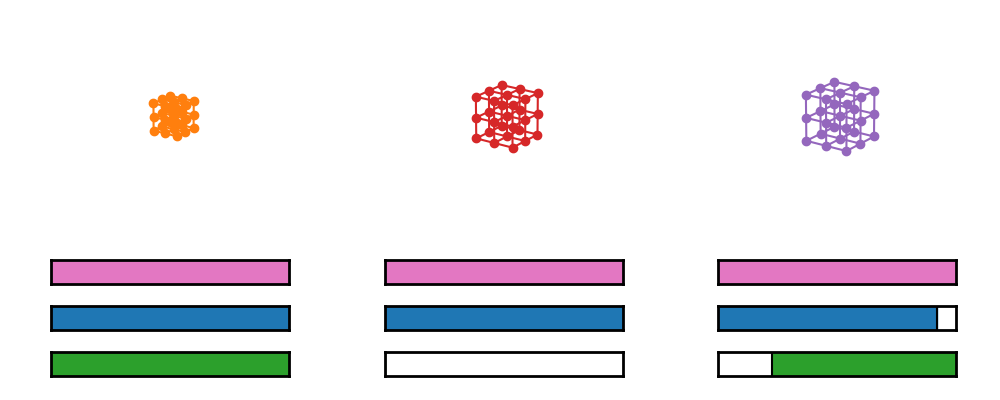

In [6]:
i=150
frame = movie(a1, a2, a3, E1, E2, E3, M1, M2, M3, K1, K2, K3)
frame.init();
frame.update(i);

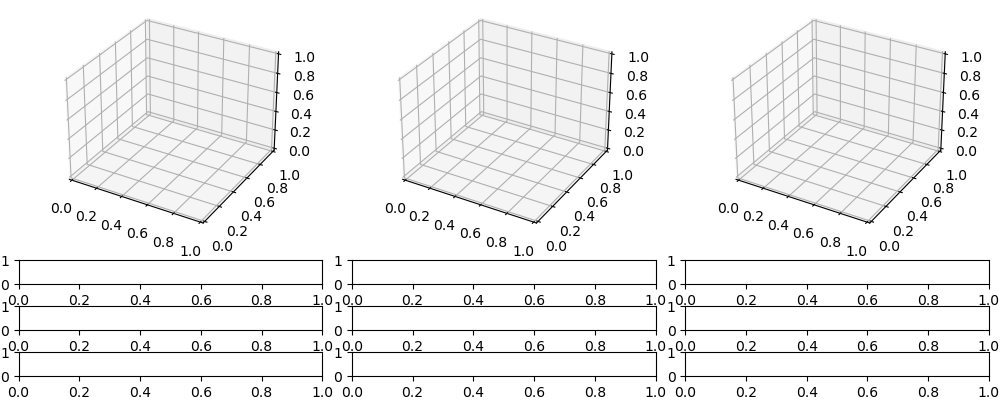

In [7]:
this_movie = movie(a1, a2, a3, E1, E2, E3, M1, M2, M3, K1, K2, K3)
animation = this_movie.animate()

In [8]:
animation.save("output/LookbackTimeSCDMCurvature.mp4", dpi=300, fps=48)